In [1]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import pandas as pd
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import statsmodels.api as sm
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix


import statsmodels.api as sm


In [2]:
data = pd.read_csv('final_with_covid_AS.csv')


In [3]:
data.shape

(54038, 58)

In [6]:
filtered_data['BeddystoCC'] = np.log(data['BeddystoCC'])


/var/folders/3l/xh28kn0j7_7d5hh7fgz188940000gn/T/ipykernel_1696/2177830916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['BeddystoCC'] = np.log(data['BeddystoCC'])


# car driver

In [4]:
filtered_data = data[data['CarDriver'] == 1]
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12582 entries, 11 to 54025
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       12582 non-null  int64  
 1   BedDys           12582 non-null  int64  
 2   BeddystoCC       12582 non-null  float64
 3   Severity         12582 non-null  int64  
 4   DiedCases        12582 non-null  int64  
 5   DiedBdDys        12582 non-null  int64  
 6   Hsptlsns         12582 non-null  int64  
 7   April            12582 non-null  int64  
 8   August           12582 non-null  int64  
 9   December         12582 non-null  int64  
 10  February         12582 non-null  int64  
 11  January          12582 non-null  int64  
 12  July             12582 non-null  int64  
 13  June             12582 non-null  int64  
 14  March            12582 non-null  int64  
 15  May              12582 non-null  int64  
 16  November         12582 non-null  int64  
 17  October    

In [5]:
target = filtered_data['Hsptlsns'].shift(-1)

In [6]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd


X = filtered_data[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]




x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 6.292951084013619
MAE: 3.6977230501928515
R^2: 0.8154530814168719


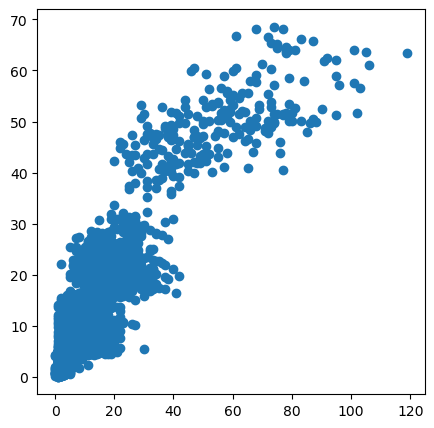

In [7]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, predicted_counts)

In [8]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 4.781255935600096
MAE: 3.065589974839281
R^2: 0.7464137281415373


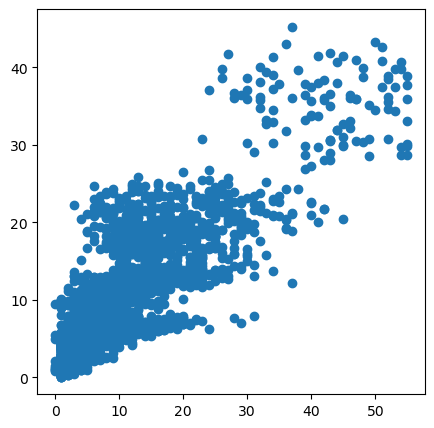

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, predicted_counts)

In [9]:
count_zeros = pd.Series(y).value_counts().get(0, 0)

print("تعداد صفرها در y:", count_zeros)

تعداد صفرها در y: 0


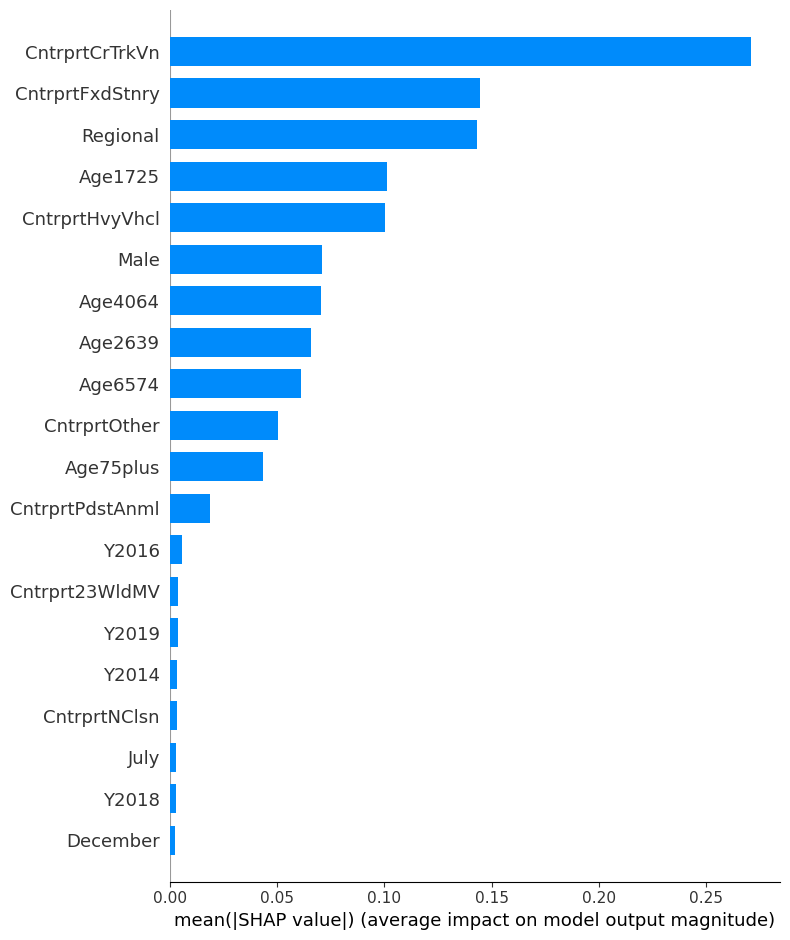

In [11]:
from sklearn.linear_model import PoissonRegressor
import shap
poisson_model = PoissonRegressor()
poisson_model.fit(x_train, y_train)

explainer = shap.Explainer(poisson_model, x_train)
shap_values = explainer.shap_values(x_test)

shap.initjs()
shap.summary_plot(shap_values, x_test,plot_type="bar")


                         Feature  Mean SHAP Value
CntrprtCrTrkVn    CntrprtCrTrkVn         0.270712
CntrprtFxdStnry  CntrprtFxdStnry         0.144741
Regional                Regional         0.143289
Age1725                  Age1725         0.101383
CntrprtHvyVhcl    CntrprtHvyVhcl         0.100159
Male                        Male         0.070807
Age4064                  Age4064         0.070325
Age2639                  Age2639         0.066025
Age6574                  Age6574         0.061197
CntrprtOther        CntrprtOther         0.050433


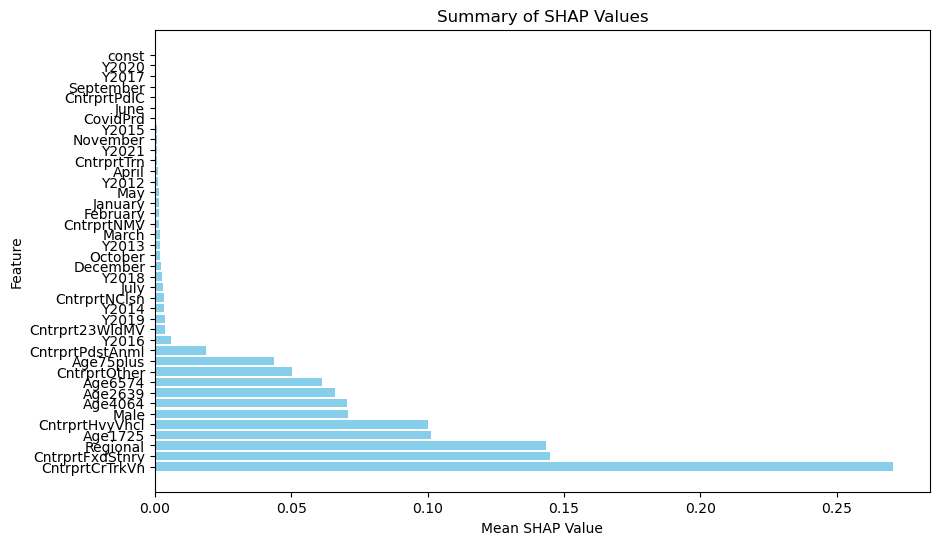

In [12]:
import shap
import pandas as pd
import matplotlib.pyplot as plt


shap_df = pd.DataFrame(shap_values, columns=x_test.columns)

shap_means = shap_df.abs().mean()

shap_summary_df = pd.DataFrame({'Feature': x_test.columns, 'Mean SHAP Value': shap_means})

shap_summary_df = shap_summary_df.sort_values(by='Mean SHAP Value', ascending=False)

print(shap_summary_df[0:10])

plt.figure(figsize=(10, 6))
plt.barh(shap_summary_df['Feature'], shap_summary_df['Mean SHAP Value'], color='skyblue')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Summary of SHAP Values')
plt.show()


# car passanger

In [15]:
filtered_data2 = data[data['CarPngr'] == 1]

In [17]:
target = filtered_data2['Hsptlsns'].shift(-1)

In [18]:

X = filtered_data2[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]




x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 2.983353270392834
MAE: 1.901385986705405
R^2: 0.6214945932546622


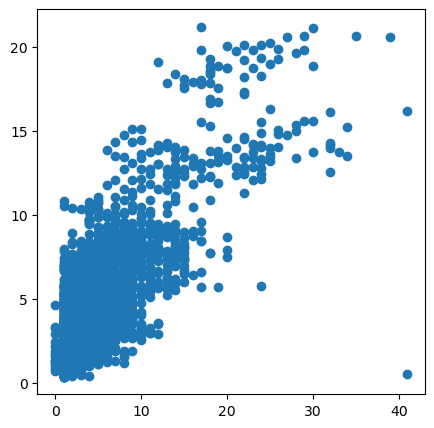

In [19]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, predicted_counts)

In [20]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 2.3703352505552124
MAE: 1.6507106932740951
R^2: 0.523903074222879


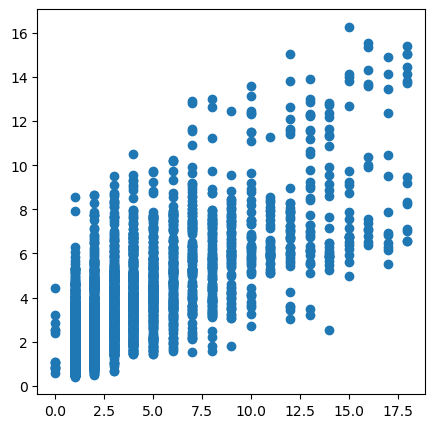

In [21]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, predicted_counts)

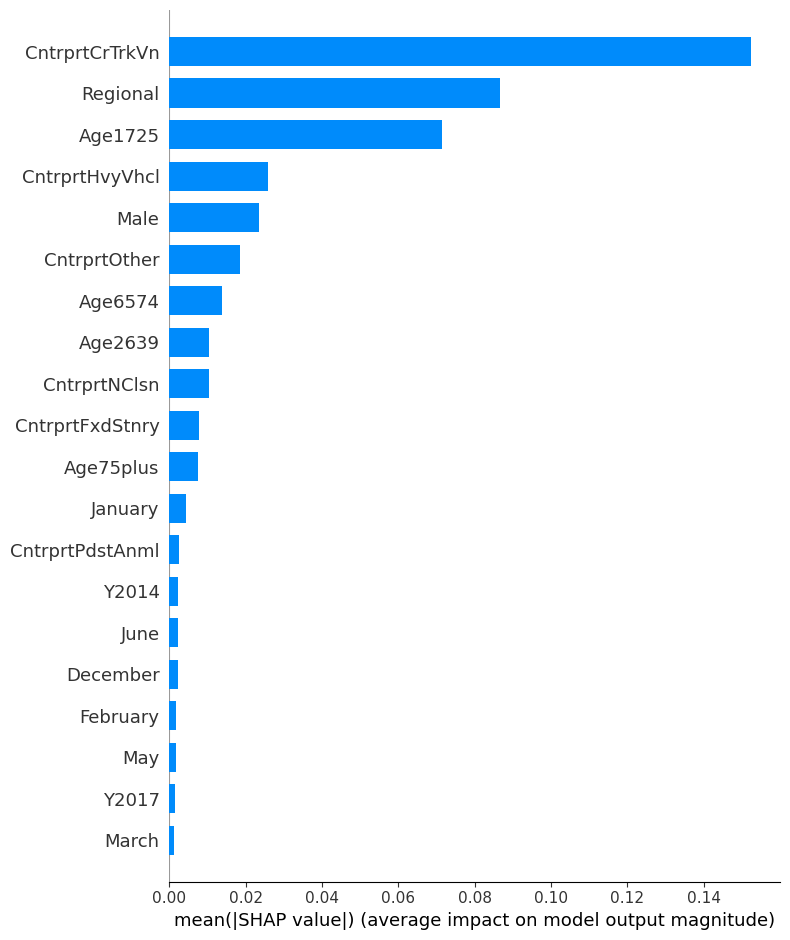

In [22]:
from sklearn.linear_model import PoissonRegressor
import shap
poisson_model = PoissonRegressor()
poisson_model.fit(x_train, y_train)

explainer = shap.Explainer(poisson_model, x_train)
shap_values = explainer.shap_values(x_test)

shap.initjs()
shap.summary_plot(shap_values, x_test,plot_type="bar")


                         Feature  Mean SHAP Value
CntrprtCrTrkVn    CntrprtCrTrkVn         0.152356
Regional                Regional         0.086593
Age1725                  Age1725         0.071353
CntrprtHvyVhcl    CntrprtHvyVhcl         0.025897
Male                        Male         0.023380
CntrprtOther        CntrprtOther         0.018449
Age6574                  Age6574         0.013763
Age2639                  Age2639         0.010475
CntrprtNClsn        CntrprtNClsn         0.010316
CntrprtFxdStnry  CntrprtFxdStnry         0.007842


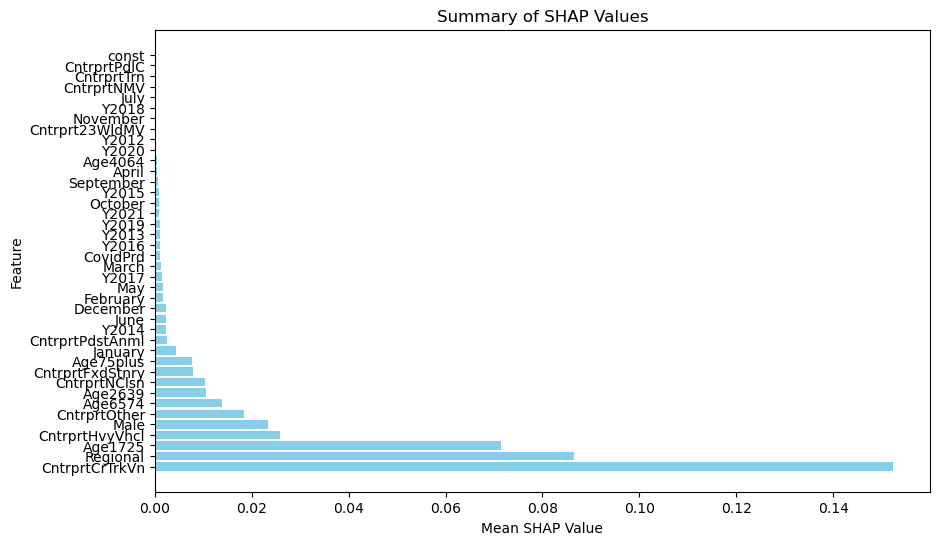

In [23]:
import shap
import pandas as pd
import matplotlib.pyplot as plt


shap_df = pd.DataFrame(shap_values, columns=x_test.columns)

shap_means = shap_df.abs().mean()

shap_summary_df = pd.DataFrame({'Feature': x_test.columns, 'Mean SHAP Value': shap_means})

shap_summary_df = shap_summary_df.sort_values(by='Mean SHAP Value', ascending=False)

print(shap_summary_df[0:10])

plt.figure(figsize=(10, 6))
plt.barh(shap_summary_df['Feature'], shap_summary_df['Mean SHAP Value'], color='skyblue')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Summary of SHAP Values')
plt.show()


# Mtrcyclist REGRESION

In [24]:
filtered_data3 = data[data['Mtrcyclist'] == 1]
filtered_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11227 entries, 3 to 54034
Data columns (total 58 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountCases       11227 non-null  int64  
 1   BedDys           11227 non-null  int64  
 2   BeddystoCC       11227 non-null  float64
 3   Severity         11227 non-null  int64  
 4   DiedCases        11227 non-null  int64  
 5   DiedBdDys        11227 non-null  int64  
 6   Hsptlsns         11227 non-null  int64  
 7   April            11227 non-null  int64  
 8   August           11227 non-null  int64  
 9   December         11227 non-null  int64  
 10  February         11227 non-null  int64  
 11  January          11227 non-null  int64  
 12  July             11227 non-null  int64  
 13  June             11227 non-null  int64  
 14  March            11227 non-null  int64  
 15  May              11227 non-null  int64  
 16  November         11227 non-null  int64  
 17  October     

In [26]:
target = filtered_data3['Hsptlsns'].shift(-1)

In [27]:

X = filtered_data3[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 4.487914206380777
MAE: 2.5964466459783413
R^2: 0.8714488291162648


In [28]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 3.5747662230401316
MAE: 2.238745102476878
R^2: 0.8349106995625302


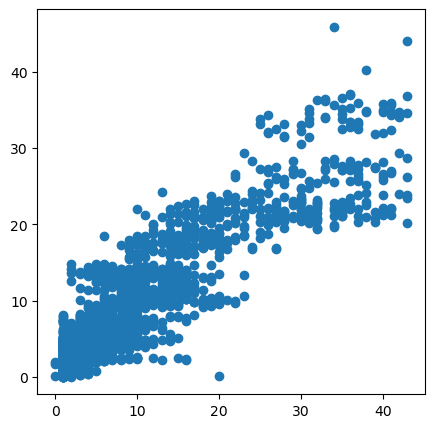

In [29]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, predicted_counts)

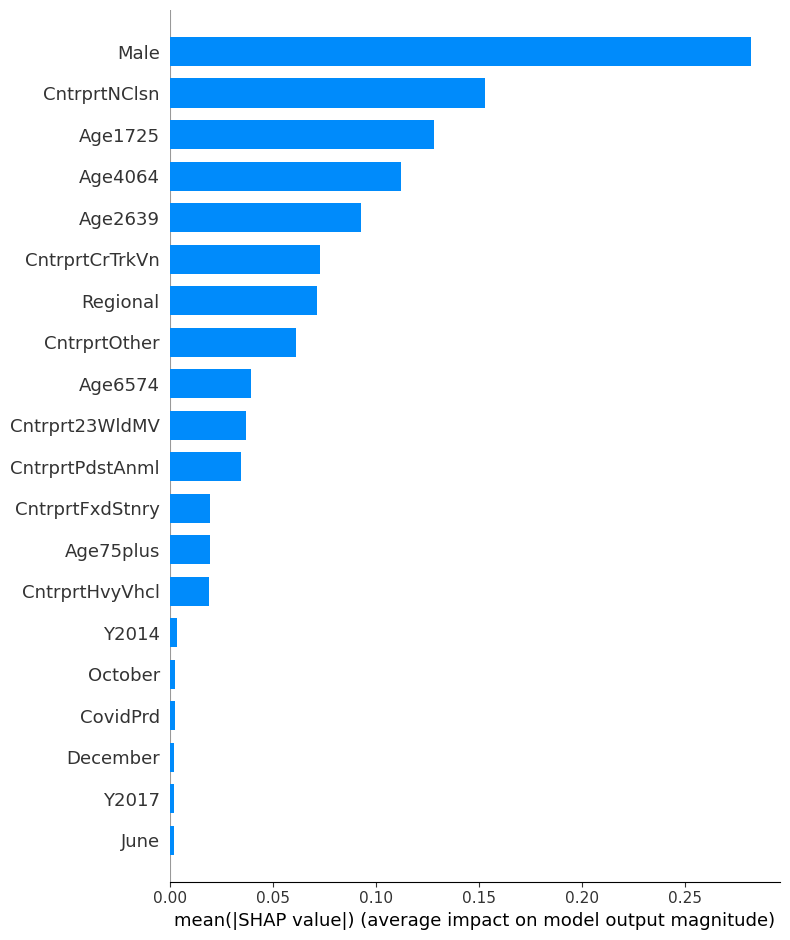

In [30]:
from sklearn.linear_model import PoissonRegressor
import shap
poisson_model = PoissonRegressor()
poisson_model.fit(x_train, y_train)

explainer = shap.Explainer(poisson_model, x_train)
shap_values = explainer.shap_values(x_test)

shap.initjs()
shap.summary_plot(shap_values, x_test,plot_type="bar")


                         Feature  Mean SHAP Value
Male                        Male         0.259347
CntrprtNClsn        CntrprtNClsn         0.131756
Age4064                  Age4064         0.124411
Age1725                  Age1725         0.115072
Age2639                  Age2639         0.111516
Regional                Regional         0.072716
CntrprtCrTrkVn    CntrprtCrTrkVn         0.054079
Cntrprt23WldMV    Cntrprt23WldMV         0.051767
CntrprtFxdStnry  CntrprtFxdStnry         0.031461
CntrprtPdstAnml  CntrprtPdstAnml         0.030891


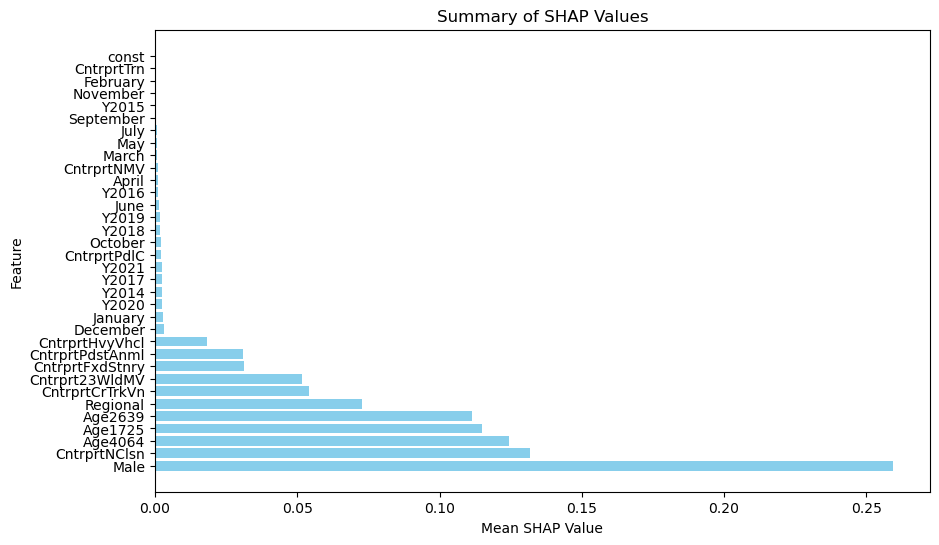

In [34]:
import shap
import pandas as pd
import matplotlib.pyplot as plt


shap_df = pd.DataFrame(shap_values, columns=x_test.columns)

shap_means = shap_df.abs().mean()

shap_summary_df = pd.DataFrame({'Feature': x_test.columns, 'Mean SHAP Value': shap_means})

shap_summary_df = shap_summary_df.sort_values(by='Mean SHAP Value', ascending=False)

print(shap_summary_df[0:10])

plt.figure(figsize=(10, 6))
plt.barh(shap_summary_df['Feature'], shap_summary_df['Mean SHAP Value'], color='skyblue')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Summary of SHAP Values')
plt.show()


# Pedal cyclist Regrasion

In [31]:
filtered_data4 = data[data['PdlCyclist'] == 1]
target = filtered_data4['Hsptlsns'].shift(-1)

X = filtered_data4[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 3.771782390637073
MAE: 2.2839303459009836
R^2: 0.821228080121559


In [32]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 3.0977801057070087
MAE: 2.006812134291563
R^2: 0.7010188225078884


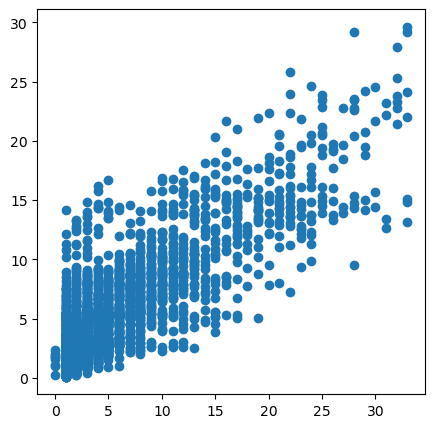

In [33]:
fig, ax = plt.subplots(figsize=(5, 5))

_ = ax.scatter(y_test, predicted_counts)

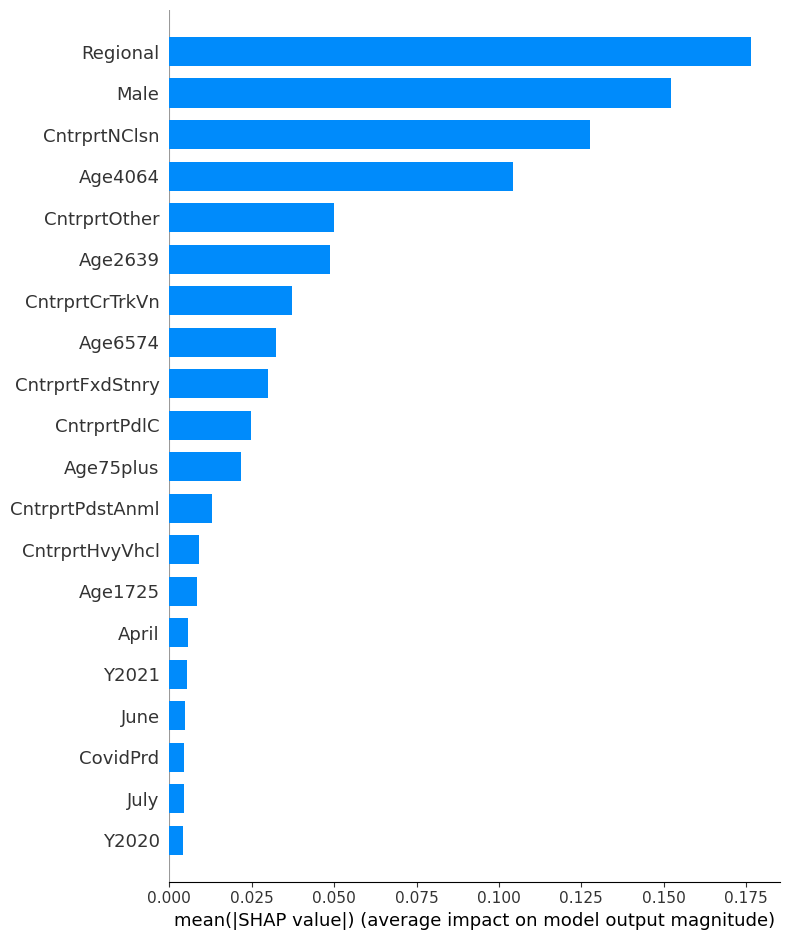

In [34]:
from sklearn.linear_model import PoissonRegressor
import shap
poisson_model = PoissonRegressor()
poisson_model.fit(x_train, y_train)

explainer = shap.Explainer(poisson_model, x_train)
shap_values = explainer.shap_values(x_test)

shap.initjs()
shap.summary_plot(shap_values, x_test,plot_type="bar")


                         Feature  Mean SHAP Value
MajorCities          MajorCities         0.174982
Male                        Male         0.148654
CntrprtNClsn        CntrprtNClsn         0.112072
Age4064                  Age4064         0.091714
CntrprtOther        CntrprtOther         0.050540
Age2639                  Age2639         0.049699
Age6574                  Age6574         0.040854
CntrprtFxdStnry  CntrprtFxdStnry         0.036826
Age07                      Age07         0.026203
CntrprtPdlC          CntrprtPdlC         0.023311


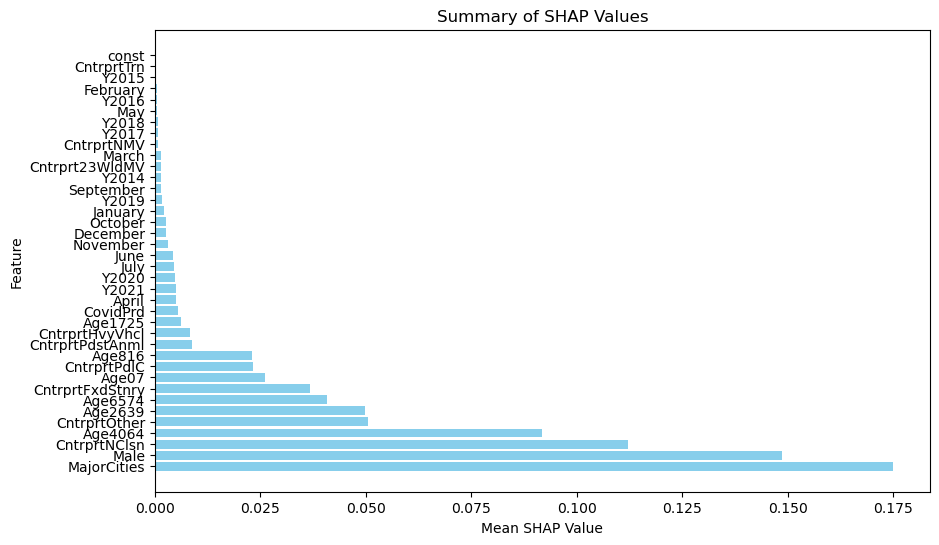

In [40]:
import shap
import pandas as pd
import matplotlib.pyplot as plt


shap_df = pd.DataFrame(shap_values, columns=x_test.columns)

shap_means = shap_df.abs().mean()

shap_summary_df = pd.DataFrame({'Feature': x_test.columns, 'Mean SHAP Value': shap_means})

shap_summary_df = shap_summary_df.sort_values(by='Mean SHAP Value', ascending=False)

print(shap_summary_df[0:10])

plt.figure(figsize=(10, 6))
plt.barh(shap_summary_df['Feature'], shap_summary_df['Mean SHAP Value'], color='skyblue')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Summary of SHAP Values')
plt.show()


# Pedestrian REGRESION

In [35]:
filtered_data5 = data[data['Pedestrian'] == 1]
target = filtered_data5['Hsptlsns'].shift(-1)

In [36]:

X = filtered_data5[['Age1725','Age2639','Age4064','Age6574','Age75plus',
                   'Male',
                   'Regional',

                   'April','December','February','January','July',
                   'June','March','May','November','October','September',

                   'Cntrprt23WldMV','CntrprtFxdStnry','CntrprtHvyVhcl',
                   'CntrprtNClsn','CntrprtOther','CntrprtNMV','CntrprtCrTrkVn',
                   'CntrprtPdlC','CntrprtPdstAnml','CntrprtTrn',

                   'Y2014','Y2015','Y2016','Y2017','Y2018','Y2019','Y2020','Y2021',
                   'Y2013','Y2012',
                   'CovidPrd']].iloc[:-1,:]


y = target.iloc[:-1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 2.622756869325506
MAE: 1.6207618723761792
R^2: 0.7689833061978666


In [37]:
mean_y = np.mean(y)
std_y = np.std(y)
outlier_threshold_high = mean_y + 3 * std_y
outlier_threshold_low = mean_y - 3 * std_y

mask = (y > outlier_threshold_low) & (y < outlier_threshold_high)

X_filtered = X[mask]
y_filtered = y[mask]

x_train, x_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.3,random_state=42)

x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

poisson_model = sm.GLM(y_train, x_train, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

predicted_counts = poisson_results.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_counts))
mae = mean_absolute_error(y_test, predicted_counts)

rss = np.sum((y_test - predicted_counts) ** 2)
tss = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (rss / tss)

print("RMSE:", rmse)
print("MAE:", mae)
print("R^2:", r_squared)


RMSE: 2.298720878946555
MAE: 1.5213823058327753
R^2: 0.7541776333618837


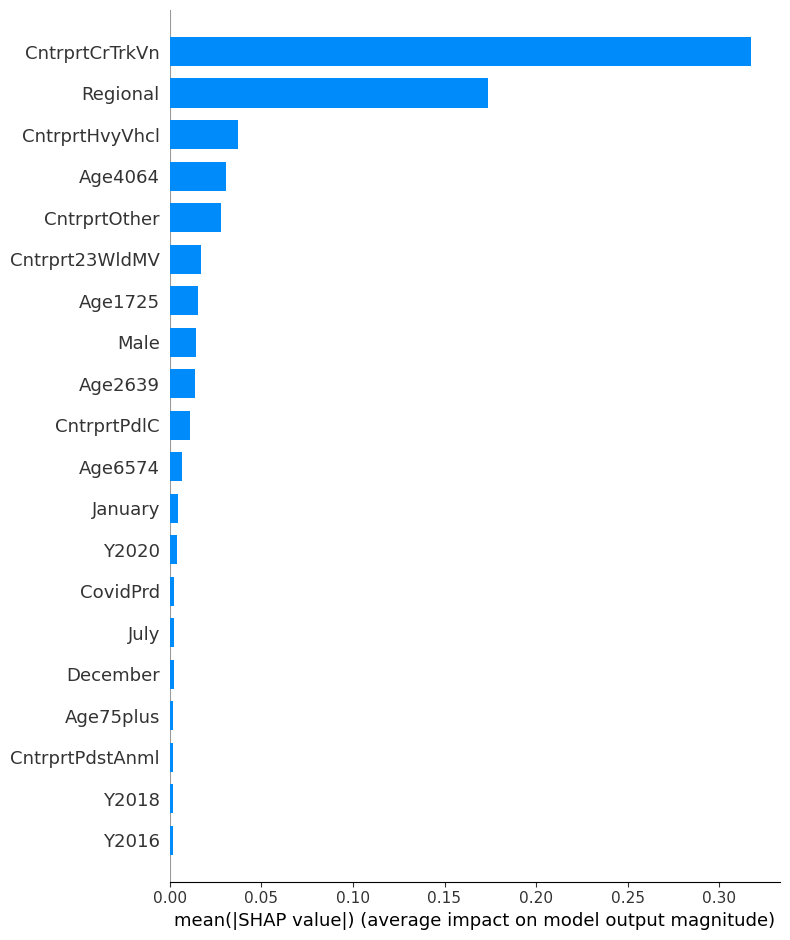

In [38]:
from sklearn.linear_model import PoissonRegressor
import shap
poisson_model = PoissonRegressor()
poisson_model.fit(x_train, y_train)

explainer = shap.Explainer(poisson_model, x_train)
shap_values = explainer.shap_values(x_test)

shap.initjs()
shap.summary_plot(shap_values, x_test,plot_type="bar")


                       Feature  Mean SHAP Value
CntrprtCrTrkVn  CntrprtCrTrkVn         0.317153
Regional              Regional         0.173636
CntrprtHvyVhcl  CntrprtHvyVhcl         0.037052
Age4064                Age4064         0.030904
CntrprtOther      CntrprtOther         0.028147
Cntrprt23WldMV  Cntrprt23WldMV         0.017319
Age1725                Age1725         0.015267
Male                      Male         0.014661
Age2639                Age2639         0.013661
CntrprtPdlC        CntrprtPdlC         0.011222


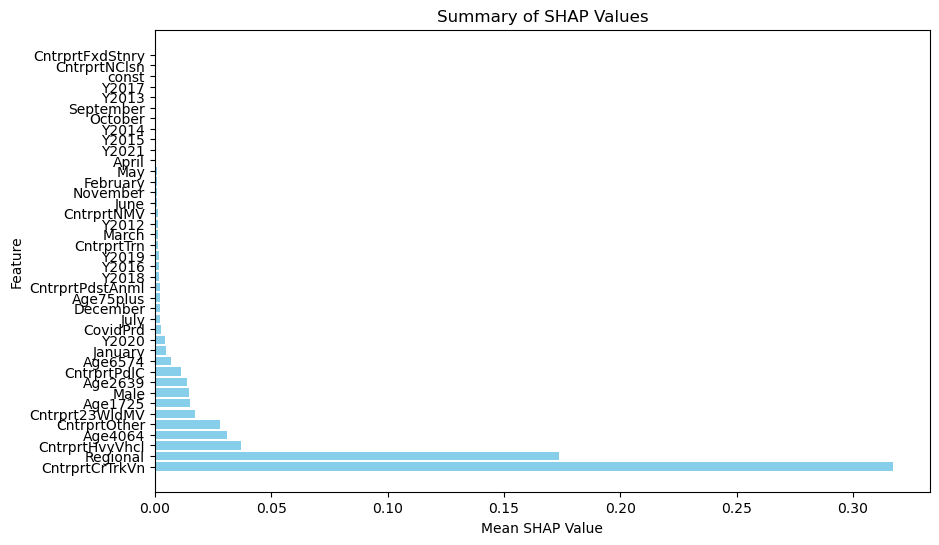

In [39]:
import shap
import pandas as pd
import matplotlib.pyplot as plt


shap_df = pd.DataFrame(shap_values, columns=x_test.columns)

shap_means = shap_df.abs().mean()

shap_summary_df = pd.DataFrame({'Feature': x_test.columns, 'Mean SHAP Value': shap_means})

shap_summary_df = shap_summary_df.sort_values(by='Mean SHAP Value', ascending=False)

print(shap_summary_df[0:10])

plt.figure(figsize=(10, 6))
plt.barh(shap_summary_df['Feature'], shap_summary_df['Mean SHAP Value'], color='skyblue')
plt.xlabel('Mean SHAP Value')
plt.ylabel('Feature')
plt.title('Summary of SHAP Values')
plt.show()


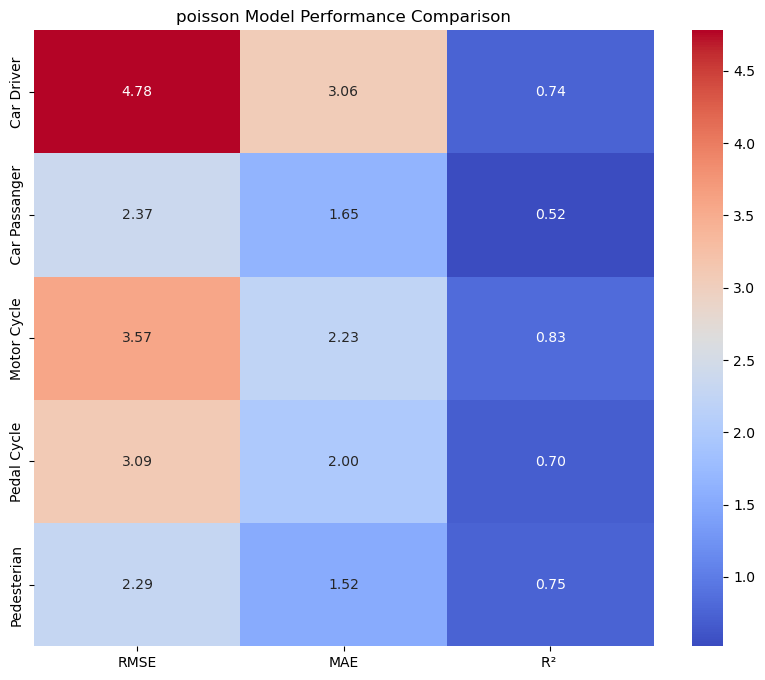

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# فرض کنید که مقادیر MSE، MAE و R² برای هر پنج مدل را دارید
mse_values = [4.78, 2.37, 3.57, 3.09, 2.29]
mae_values = [3.06, 1.65,2.23,2.00, 1.52]
r2_values = [0.74, 0.52,0.83,0.7  ,0.75]

# ایجاد داده‌ها برای هیت مپ
metrics = ['Car Driver', ' Car Passanger ', 'Motor Cycle', 'Pedal Cycle', 'Pedesterian']
models = ['RMSE', 'MAE', 'R² ']
data = np.array([mse_values, mae_values, r2_values]).T
#metrics
# ایجاد هیت مپ
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(data, annot=True, fmt='.2f', xticklabels=models, yticklabels=metrics, cmap='coolwarm')
heatmap.set_title('poisson Model Performance Comparison')

plt.show()

ValueError: x and y must have same first dimension, but have shapes (5, 1) and (3,)

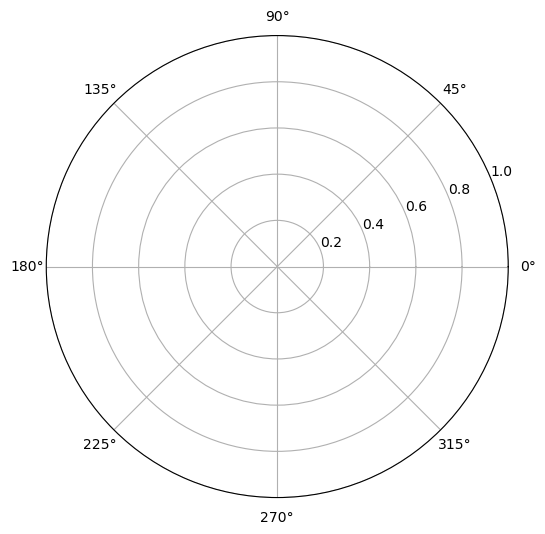

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# فرض کنید که مقادیر MSE، MAE و R² برای هر پنج مدل را دارید
mse_values = [4.78, 2.37, 3.57, 3.09, 2.29]
mae_values = [3.06, 1.65, 2.23, 2.00, 1.52]
r2_values = [0.74, 0.52, 0.83, 0.7, 0.64]

# ایجاد داده‌ها برای نمودار عنکبوتی
metrics = ['MSE', 'MAE', 'R²']
models = ['Car Driver', 'Car Passenger', 'Motor Cycle', 'Pedal Cycle', 'Pedestrian']
data = np.array([mse_values, mae_values, r2_values]).T

# ایجاد نمودار عنکبوتی
plt.figure(figsize=(8, 6))
angles = np.linspace(0, 2 * np.pi, len(models), endpoint=False)

# تبدیل شکل angles به (len(models),) برای مطابقت با شکل data
angles = np.expand_dims(angles, axis=1)

# رسم نمودار عنکبوتی برای هر مدل
for d, model in zip(data, models):
    plt.polar(angles, d, label=model)

# افزودن برچسب‌ها و عنوان
plt.fill(angles, np.zeros_like(angles), 'alpha', 0.2)
plt.xticks(angles[:-1] + np.pi / len(models), metrics)
plt.yticks([0, 1, 2, 3, 4], ['0', '1', '2', '3', '4'])
plt.ylim(0, 5)
plt.title('Xgboost Model Performance Comparison')
plt.legend()

plt.show()

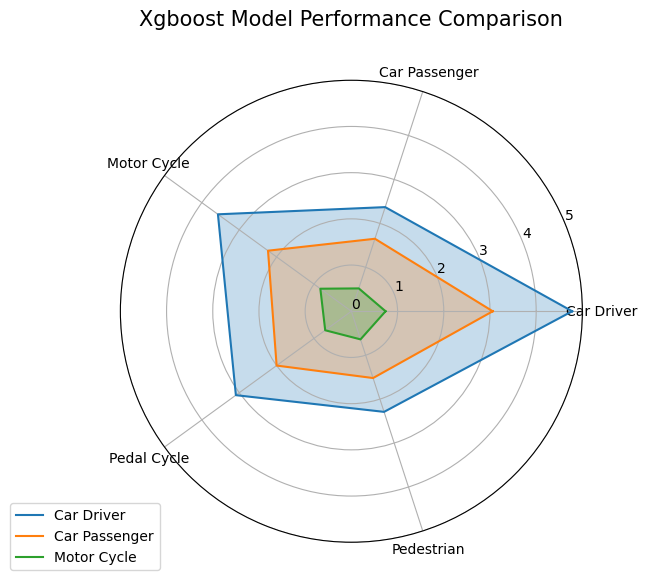

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# مقادیر MSE، MAE و R² برای هر پنج مدل
mse_values = [4.78, 2.37, 3.57, 3.09, 2.29]
mae_values = [3.06, 1.65, 2.23, 2.00, 1.52]
r2_values = [0.74, 0.52, 0.83, 0.70, 0.64]

# نام مدل‌ها
labels = np.array(['Car Driver', 'Car Passenger', 'Motor Cycle', 'Pedal Cycle', 'Pedestrian'])

# ترکیب داده‌ها در یک آرایه
data = np.array([mse_values, mae_values, r2_values])

# ایجاد یک نمودار اسپایدر برای هر معیار
num_vars = data.shape[1]
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
data = np.concatenate((data, data[:,[0]]), axis=1)  # بستن دایره
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# رسم خطوط برای هر مدل
for idx in range(len(data)):
    ax.fill(angles, data[idx], alpha=0.25)
    ax.plot(angles, data[idx], label=models[idx])

ax.set_yticks([0, 1, 2, 3, 4, 5])
ax.set_yticklabels(['0', '1', '2', '3', '4', '5'])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.title('Xgboost Model Performance Comparison', size=15, color='black', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

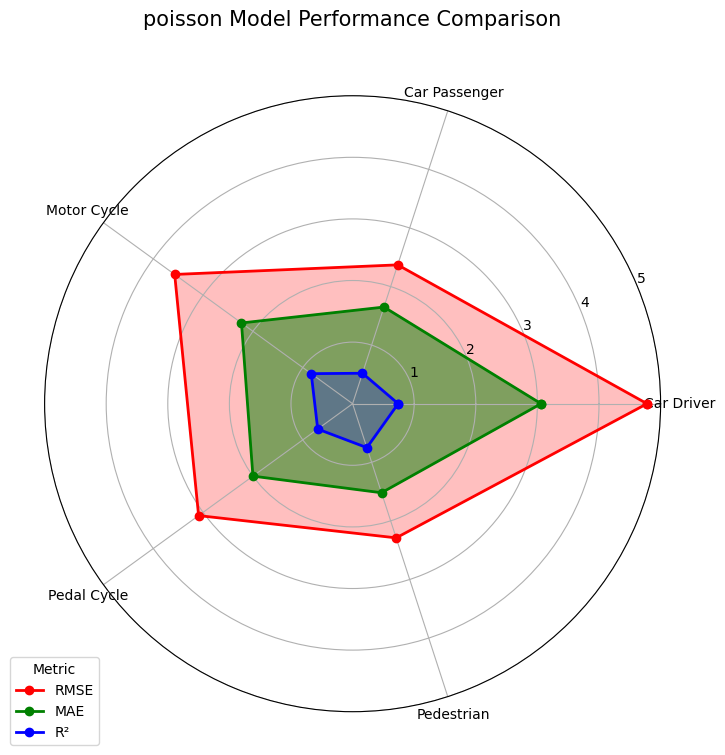

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# مقادیر MSE، MAE و R² برای هر پنج مدل
mse_values = [4.78, 2.37, 3.57, 3.09 , 2.29]
mae_values = [3.06, 1.65,2.23,2.00 , 1.52]
r2_values = [0.74, 0.52,0.83,0.7  ,0.75]

# نام مدل‌ها
labels = ['Car Driver', 'Car Passenger', 'Motor Cycle', 'Pedal Cycle', 'Pedestrian']

# ترکیب داده‌ها در یک آرایه
data = np.array([mse_values, mae_values, r2_values])

# تعداد متغیرها
num_vars = data.shape[1]

# تقسیم دایره به بخش‌های مساوی
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # بستن دایره

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# رنگ‌ها برای هر معیار
colors = ['red', 'green', 'blue']
labels_metric = ['RMSE', 'MAE', 'R²']

for idx, (data_slice, color, label) in enumerate(zip(data, colors, labels_metric)):
    if label == 'MAE':
        alpha_value = 0.5  # تنظیم شفافیت برای MAE
    else:
        alpha_value = 0.25  # تنظیم شفافیت برای سایر معیارها
    data_slice = np.concatenate([data_slice, [data_slice[0]]])  # بستن دایره
    ax.plot(angles, data_slice, 'o-', linewidth=2, label=label, color=color)
    ax.fill(angles, data_slice, alpha=alpha_value, color=color)

ax.set_xticks(angles[:-1])  # تنظیم موقعیت برچسب‌ها
ax.set_xticklabels(labels)
ax.set_yticks([1, 2, 3, 4, 5])  # تنظیم مقیاس محور y
ax.set_yticklabels(['1', '2', '3', '4', '5'])

plt.title('poisson Model Performance Comparison', size=15, color='black', y=1.1)
plt.legend(title='Metric', loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()
